## Zadanie 12

In [26]:
import numpy as np

In [78]:
P1 = np.array([
    [1,0,0,0,0,0],
    [1/6,1/6,1/6,1/6,1/6,1/6],
    [1,0,0,0,0,0],
    [0,1/2,0,0,1/2,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0]
])

alphas = [0, 0.15, 0.5, 1]

In [79]:
def find_stationary_distribution(M, iterations = 100000):
    n, _ = M.shape
    pi = np.matrix([1/n] * n)
    for _ in range(iterations):
        pi = pi * M

    return pi

In [80]:
def get_google_matrix(P, alpha):
    n, _ = P.shape
    J = np.ones((n, n))
    return (1 - alpha) * P + alpha * 1 / n * J

In [81]:
for alpha in alphas:
    pi = find_stationary_distribution(get_google_matrix(P1, alpha))
    print(f"\nAlpha: {alpha}, Distribution: {pi}, Sum: {pi.sum()}")


Alpha: 0, Distribution: [[1.0e+000 2.0e-323 9.9e-324 2.5e-323 2.0e-323 4.9e-324]], Sum: 0.9999999999999986

Alpha: 0.15, Distribution: [[0.62687053 0.08154506 0.0676216  0.10586552 0.08154506 0.03655222]], Sum: 0.9999999999999999

Alpha: 0.5, Distribution: [[0.33108108 0.13513514 0.14189189 0.16216216 0.13513514 0.09459459]], Sum: 1.0

Alpha: 1, Distribution: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]], Sum: 0.9999999999999998


## Zadanie 13

In [31]:
P2 = np.matrix([
    [0, 3/10, 1/10, 3/5],
    [1/10, 1/10, 7/10, 1/10],
    [1/10, 7/10, 1/10, 1/10],
    [9/10, 1/10, 0, 0]
])

## a

In [32]:
pi = find_stationary_distribution(P2)
print(pi)

[[0.2345679  0.30478395 0.26311728 0.19753086]]


## b

In [82]:
np.linalg.matrix_power(P2, 128).item(0, 3)

0.1975308641975304

## c

In [34]:
np.matmul([1/4] * 4, np.linalg.matrix_power(P2, 128)).item(0, 3)

0.1975308641975304

## d

In [35]:
epsilons = [1/10,1/100,1/1000]

In [36]:
results = []

for epsilon in epsilons:
    t = 0
    while True:
        p_0_s = np.linalg.matrix_power(P2, t)[0]

        if np.max(np.abs(p_0_s - pi)) <= epsilon:
            results.append(t)
            break

        t += 1

In [37]:
results

[5, 13, 21]

## Zadanie 13

In [69]:
P3 = np.array([
    [0, 1/2, 1/2, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1/3, 0, 1/3, 1/3],
    [1, 0, 0, 0, 0],
    [1/5, 1/5, 1/5, 1/5, 1/5],
])

alphas = [0, 0.25, 0.5, 0.75, 0.85, 1]

result = {}
for alpha in alphas:
    result[alpha] = []
    google_matrix = get_google_matrix(P3, alpha)
    result[alpha].append(google_matrix)
    stationary_pi = find_stationary_distribution(google_matrix)

    for i in range(1, 26):
        pi = find_stationary_distribution(google_matrix, iterations=i)
        result[alpha].append((
            pi,
            np.max(np.abs(pi - stationary_pi))
        ))


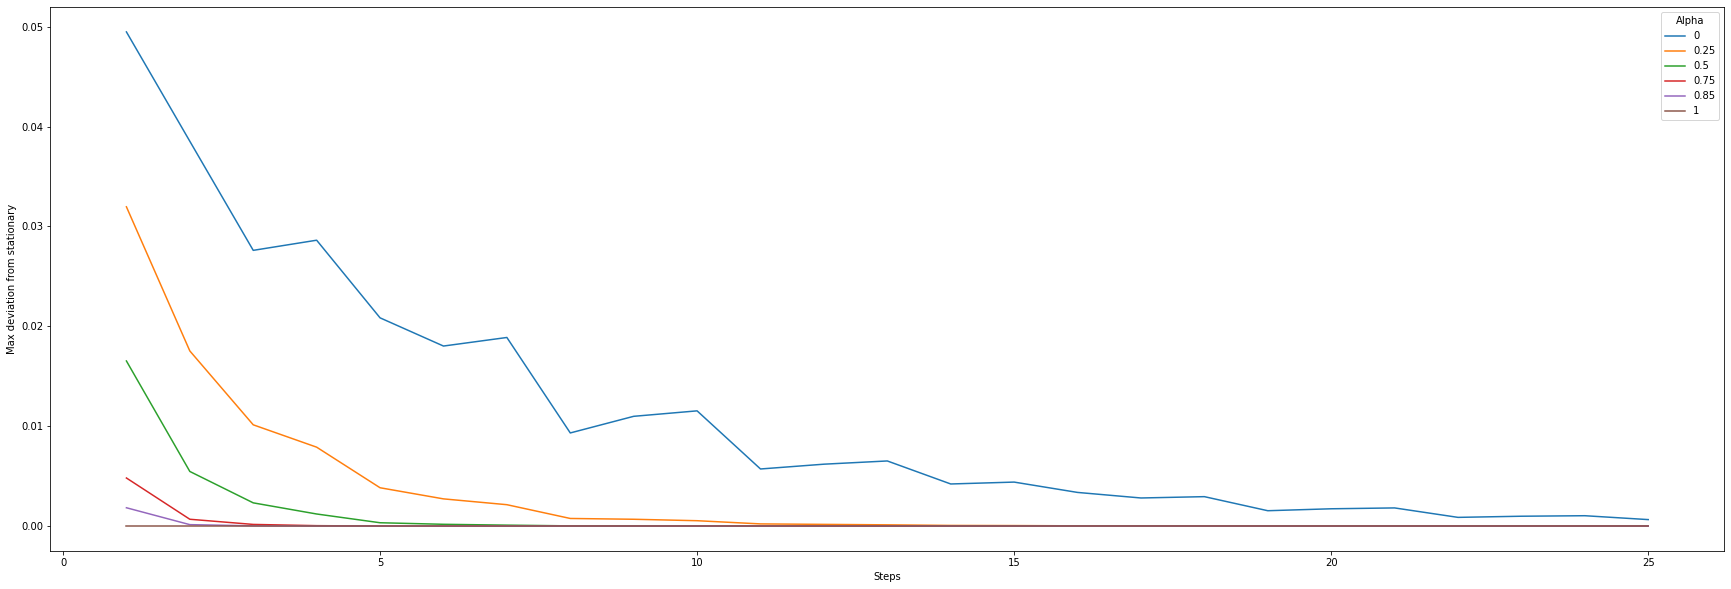

In [71]:
from matplotlib import pyplot as plt

plt.figure(1, figsize=(30,10))
for alpha in alphas:
    plot_data = []

    for i in range(1, 26):
        plot_data.append((i, result[alpha][i][1]))

    plt.plot(*zip(*plot_data), label=alpha)

plt.legend(title="Alpha")
plt.ylabel('Max deviation from stationary')
plt.xlabel('Steps')
plt.show()

In [58]:
result[0.25][25][0]

matrix([[0.26196473, 0.20538677, 0.16430955, 0.26118926, 0.10714968]])

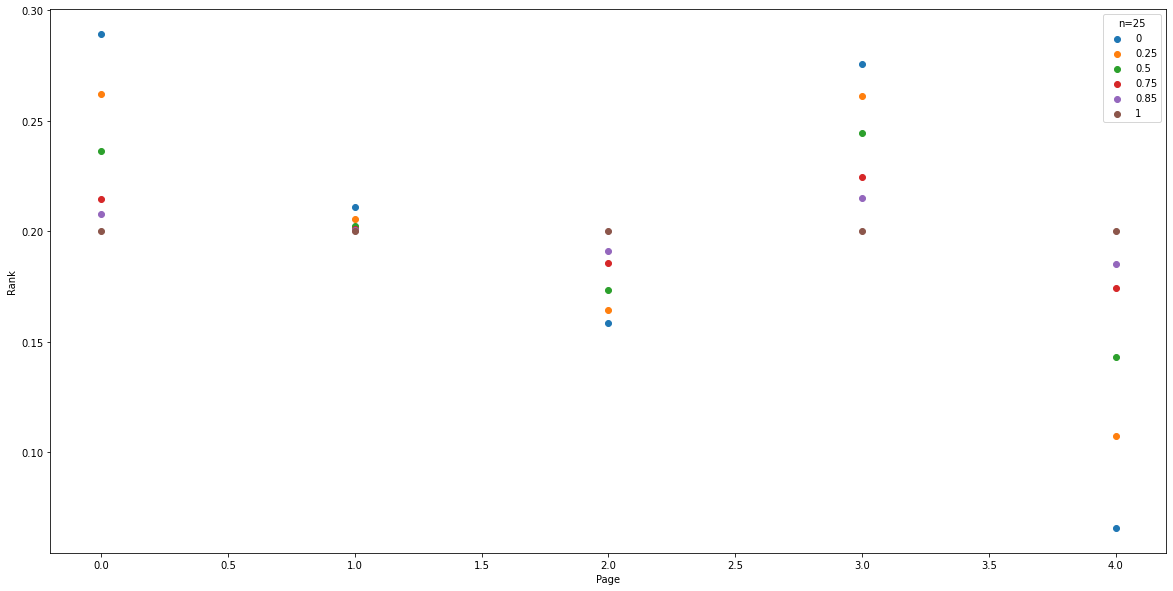

In [77]:
plt.figure(1, figsize=(20,10))

for i in range(25, 26):
    for alpha in alphas:
        plot_data = []
        
        for n in range(5):
            plot_data.append((
                n,
                result[alpha][i][0].item(0, n)
            ))
        
        plt.scatter(*zip(*plot_data), label=alpha)

plt.legend(title="n=25")
plt.ylabel('Rank')
plt.xlabel('Page')
plt.show()